# Ex04 - Filtragem em frequência

Neste exercício vamos testar a filtragem no Domínio da Frequência utilizando a Transformada Discreta de Fourier (DFT). 

### Parte 1 - DFT e DFT inversa

Primeiro, vamos exercitar o cálculo e a visualização da DFT e DFT inversa. Também vamos verificar que a DFT inversa da DFT de uma imagem é a própria imagem, de acordo com as propriedades da Transformada de Fourier. 

In [4]:
import numpy as np
import sys,os
ea979path = os.path.abspath('../../')
if ea979path not in sys.path:
    sys.path.append(ea979path)
import ea979.src as ia
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf

Para comprovar, usaremos a imagem do cameraman. Primeiro, iremos calcular a DFT da imagem usando a função fft2 do Numpy ([veja a documentação](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft2.html)). E, para visualizar o espectro, utilizaremos a função dftview da biblioteca ea979. O que esta função faz é calcular o log da magnitude e depois transladar a transformada para centralizá-la ([ea979/dftview](../src/dftview.ipynb)).

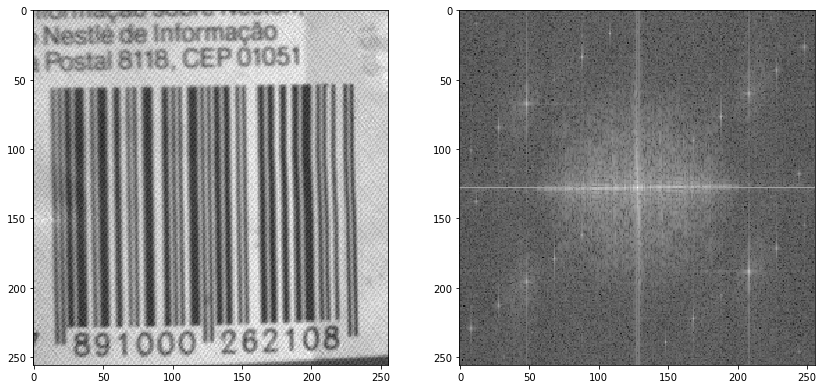

In [3]:
f = mpimg.imread('../data/barcode.tif')

F = np.fft.fft2(f)
plt.figure(1, figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(f, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ia.dftview(F), cmap='gray')

#### 1.1 Visualizando a DFT de várias formas
Vamos tentar visualizar a DFT sem usar a função pronta dftview. Visualize primeiro a Transformada de Fourier sem centralizá-la e sem usar o log. Depois visualize centralizando, ainda sem o log. E por último, visualize com dftview. Plote as 3 imagens, uma ao lado da outra para poder compará-las.

#### 1.2 Calculando a DFT inversa
Calcule a DFT inversa usando a função ifft2 da mesma biblioteca. Compare o resultado da DFT inversa com a imagem original, não só visualizando as imagens lado a lado, mas numericamente.

### Parte 2 - Filtrando imagens no domínio da frequência

Para realizar a filtragem no domínio da frequência, utilizamos o Teorema da Convolução, que garante que a convolução no domínio espacial equivale a um produto no domínio da frequência. 

Ou seja, ao invés de aplicarmos um filtro no domínio espacial através da convolução da imagem $f(x,y)$ com uma máscara $h(x,y)$ podemos aplicar um filtro no domínio da frequência através do produto da Transformada de Fourier da imagem $F(u,v)$ com a Transformada de Fourier da máscara (filtro) $H(u,v)$.

Ou seja, o primeiro passo é criar um filtro $H(u,v)$ no domínio da frequência. Lembrando que:

- mais fácil criar o filtro centrado e depois transladar para as pontas
- filtro precisa ser simétrico conjungado
- para saber mais sobre como criar um filtro passa-baixas e um filtro passa-altas, consulte o tutorial [Filtros em frequência](12_Filtros_em_frequencia.ipynb)

#### 2.1 Projetando um filtro no domínio da frequência

Utilize a função abaixo para criar 2 filtros ideais: um filtro passa-baixas (FPB) e um filtro passa-altas (FPA). Os filtros devem ser criados para filtrar a imagem do *barcode* apresentada na Parte 1 deste notebook. Visualize os filtros antes de usá-los.

In [453]:
# Criando o filtro ideal (circulo) em frequência

def cria_filtro_ideal(f, r1, r2):
        
    x,y = f.shape
    
    c1=ia.circle(f.shape, r1, np.divide(f.shape, 2))
    c2=ia.circle(f.shape, r2, np.divide(f.shape, 2))
    
    H = np.logical_xor(c1,c2)
    return ia.ptrans(H,(x//2,y//2))

#### 2.2 Filtrando imagens no domínio da frequência

Utilize os filtros FPB e FPA projetados acima para filtrar a imagem *barcode*. A filtragem deve ser feita no domínio da frequência (usando o Teorema da Convolução) e depois de calcular a Transformada de Fourier inversa, a imagem filtrada resultante deve ser visualizada no domínio espacial. Altere a frequência de corte de cada filtro e justifique sua escolha. Explique o efeito de cada um dos filtros aplicados.

### Parte 3 - Recuperando uma imagem *halftone*

A imagem a seguir foi gerada com uma técnica conhecida por haltone (meio-tom). Esta técnica simula a ilusão de tom contínuo reproduzindo seus muitos pontos num tamanho não facilmente perceptível por quem observa. Essa ilusão de óptica é importante porque compensa a inabilidade das impressões e tintas para criar escalas de tons que vão do sólido (geralmente preto) ao tom de um papel sem tinta (geralmente branco).

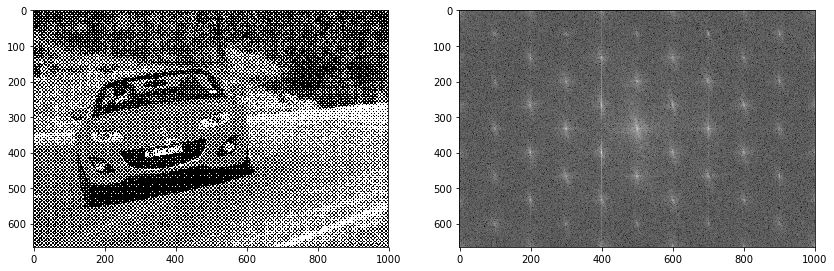

In [457]:
f2 = mpimg.imread('../data/halftone.png')

F2 = np.fft.fft2(f2)
plt.figure(1, figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(f2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ia.dftview(F2), cmap='gray')


Como podemos ver na figura da direita, o espectro de Fourier de uma imagem *halftone* apresenta uma característica bem interessante: ele apresenta cópias do espectro original espalhadas nas alta frequências.

Projete e utilize um filtro no domínio da frequência para melhorar a qualidade da imagem *halftone*. Explique sua solução.